In [7]:
# Parodomos pirmos penkios duomeų eilutės

import pandas as pd
file_path = "Iris.csv"
df = pd.read_csv(file_path)
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


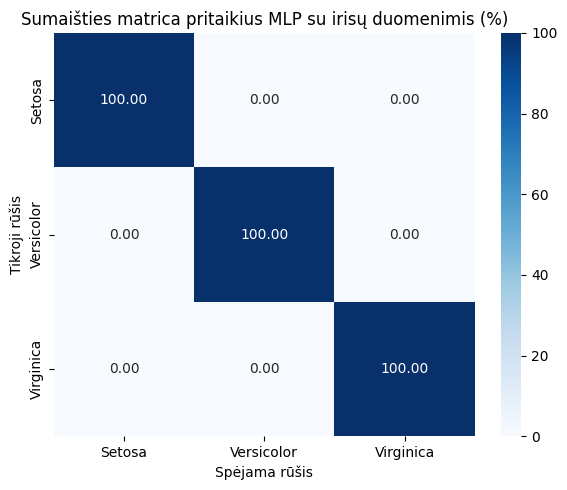

In [11]:
# MLP naudojamas su originaliais duomenimis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["Species"] = iris.target

species_names = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
df["Species"] = df["Species"].map(species_names)

X = df.drop(columns=["Species"])
y = df["Species"]

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=7, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 5))
sns.heatmap(cm_pct, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.title("Sumaišties matrica pritaikius MLP su irisų duomenimis (%)")
plt.tight_layout()
plt.show()
